In [ ]:
# Import Dependencies
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read In CSV File
# Read the dataset from a CSV file into a DataFrame
credit_data = pd.read_csv('Resources/credit_data.csv')
# Display the first few rows of the DataFrame
credit_data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,"2,685",2,"4,675,000",2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,"2,371",9,"3,619,000",5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,"2,771",6,"957,000",2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,"1,371",2,"4,731,000",6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,"3,289,000",6.28,36,Personal Loan


In [3]:
# Add A Column That Bucket's Age Groups By 20's, 30's, 40's, 50's, and 60's
# Define conditions for age ranges
# Define the age group conditions (20s, 30s, etc.)
conditions = [
    (credit_data['Age'] >= 20) & (credit_data['Age'] <= 29),
    (credit_data['Age'] >= 30) & (credit_data['Age'] <= 39),
    (credit_data['Age'] >= 40) & (credit_data['Age'] <= 49),
    (credit_data['Age'] >= 50) & (credit_data['Age'] <= 59),
    (credit_data['Age'] >= 60) & (credit_data['Age'] <= 69)
]

# Define corresponding labels
# Define the labels that correspond to each age group
labels = ['twenties', 'thirties', 'forties', 'fifties', 'sixties']

# Create new column
# Use numpy's select function to categorize Age into defined age groups
credit_data['Age Group'] = np.select(conditions, labels, default='other')

# Preview the result
# Display the first few rows of the DataFrame
credit_data[['Age', 'Age Group']].head()

# Save to a new CSV file
# Save the updated DataFrame to a new CSV file
credit_data.to_csv('Resources/credit_data_updated.csv', index=False)

In [4]:
# Read In Updated CSV File
# Read the dataset from a CSV file into a DataFrame
credit_data_updated = pd.read_csv('Resources/credit_data_updated.csv')
# Display the first few rows of the DataFrame
credit_data_updated.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Age Group
0,60,Male,Married,Master,Employed,0.22,"2,685",2,"4,675,000",2.65,48,Personal Loan,sixties
1,25,Male,Married,High School,Unemployed,0.20,"2,371",9,"3,619,000",5.19,60,Auto Loan,twenties
2,30,Female,Single,Master,Employed,0.22,"2,771",6,"957,000",2.76,12,Auto Loan,thirties
3,58,Female,Married,PhD,Unemployed,0.12,"1,371",2,"4,731,000",6.57,60,Auto Loan,fifties
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,"3,289,000",6.28,36,Personal Loan,thirties


In [5]:
# Inspect the data types for each column and adjust accordingly
# Get a concise summary of the DataFrame including datatypes and nulls
credit_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   object 
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   object 
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
 12  Age Group                  1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 

In [6]:
# Update column types accordingly and re-validate
credit_data_updated.columns = credit_data_updated.columns.str.strip()

credit_data_updated['Payment History'] = credit_data_updated['Payment History'].astype(str).str.replace(',', '').str.strip().replace({'-': None, '': None})
credit_data_updated['Payment History'] = credit_data_updated['Payment History'].dropna().astype('int64')
credit_data_updated['Loan Amount'] = credit_data_updated['Loan Amount'].astype(str).str.replace(',', '').str.strip().replace({'-': None, '': None})
credit_data_updated['Loan Amount'] = credit_data_updated['Loan Amount'].dropna().astype('int64')

# Get a concise summary of the DataFrame including datatypes and nulls
credit_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   int64  
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
 12  Age Group                  1000 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 

In [7]:
# Analysis: Find Count Of Loan Type Per Gender
loan_type_by_gender = credit_data_updated.groupby(['Gender', 'Type of Loan']).size().reset_index(name='Count')
loan_type_by_gender_pivot = loan_type_by_gender.pivot(index='Gender', columns='Type of Loan', values='Count').fillna(0)
print(loan_type_by_gender_pivot)

Type of Loan  Auto Loan  Home Loan  Personal Loan
Gender                                           
Female              168        171            160
Male                180        157            164


In [8]:
# Analysis: Find Average Loan Amount Per Education Status
avg_loan_by_education = credit_data_updated.groupby('Education Level')['Loan Amount'].mean().sort_values(ascending=False)

avg_loan_by_education_formatted = avg_loan_by_education.apply(lambda x: f"{x:,.0f}")
print(avg_loan_by_education_formatted)

Education Level
Bachelor       2,542,095
Master         2,503,557
PhD            2,470,261
High School    2,370,104
Name: Loan Amount, dtype: object


In [9]:
# Analysis: Find Average Term Length Per Type Of Loan
avg_term_by_loan_type = credit_data_updated.groupby('Type of Loan')['Loan Term'].mean().sort_values(ascending=False)
print(avg_term_by_loan_type)

Type of Loan
Home Loan        37.573171
Auto Loan        37.103448
Personal Loan    36.703704
Name: Loan Term, dtype: float64


In [10]:
# Make a copy of the data
data = credit_data_updated.copy()

In [11]:
# Define features and target
features = ['Age', 'Gender', 'Marital Status', 'Education Level', 'Employment Status',
            'Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts', 'Age Group']
target = 'Type of Loan'

In [12]:
# Encode categorical features
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [13]:
# Encode the target column
target_encoder = LabelEncoder()
data[target] = target_encoder.fit_transform(data[target])

In [14]:
# Split into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on test data
y_pred = tree_model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

In [18]:
# Output results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Model Accuracy: 0.39

Classification Report:
                precision    recall  f1-score   support

    Auto Loan       0.44      0.35      0.39        79
    Home Loan       0.41      0.41      0.41        63
Personal Loan       0.32      0.41      0.36        58

     accuracy                           0.39       200
    macro avg       0.39      0.39      0.39       200
 weighted avg       0.40      0.39      0.39       200



In [ ]:
# Get feature importance from the tuned decision tree model
importances = tree_model.feature_importances_
feature_names = X.columns

In [20]:
# Sort by importance
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

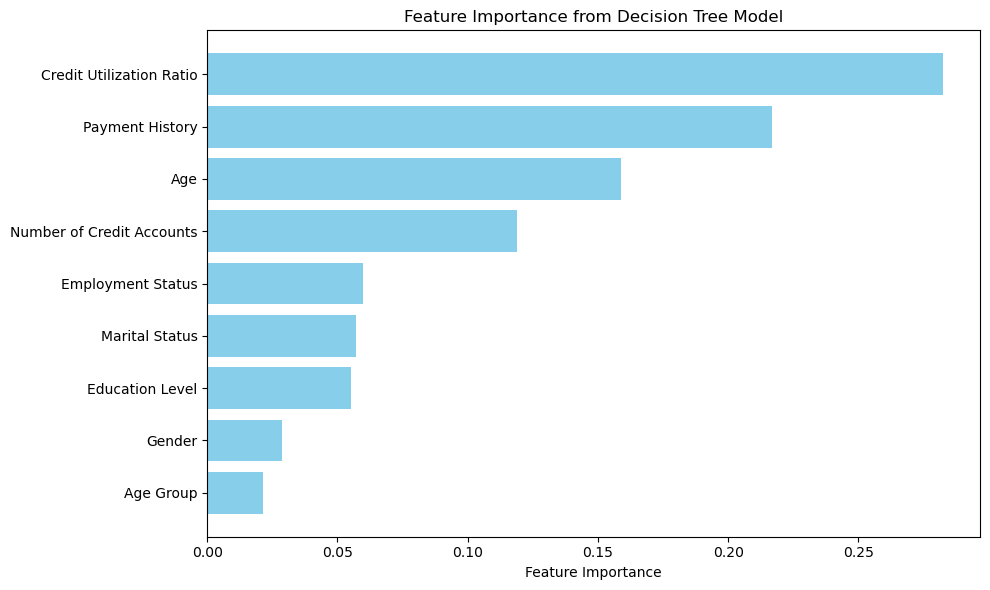

In [21]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Decision Tree Model")
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.show()

In [22]:
# Improve the accuracy for Decision Tree
# Define parameter grid for tuning
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [23]:
# Setup GridSearchCV
grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [24]:
# Fit to training data
grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [25]:
# Get best model from grid search
best_tree_model = grid_search_tree.best_estimator_

In [26]:
# Predict on test set
y_pred_best_tree = best_tree_model.predict(X_test)

In [27]:
# Print the results
print(f"Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best_tree):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_tree, target_names=target_encoder.classes_))

Best Decision Tree Accuracy: 0.34

Classification Report:
                precision    recall  f1-score   support

    Auto Loan       0.36      0.30      0.33        79
    Home Loan       0.33      0.41      0.37        63
Personal Loan       0.31      0.29      0.30        58

     accuracy                           0.34       200
    macro avg       0.33      0.34      0.33       200
 weighted avg       0.34      0.34      0.33       200



In [28]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [30]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_)

In [31]:
# Output results
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.34

Random Forest Classification Report:
                precision    recall  f1-score   support

    Auto Loan       0.39      0.30      0.34        79
    Home Loan       0.39      0.41      0.40        63
Personal Loan       0.25      0.31      0.28        58

     accuracy                           0.34       200
    macro avg       0.34      0.34      0.34       200
 weighted avg       0.35      0.34      0.34       200



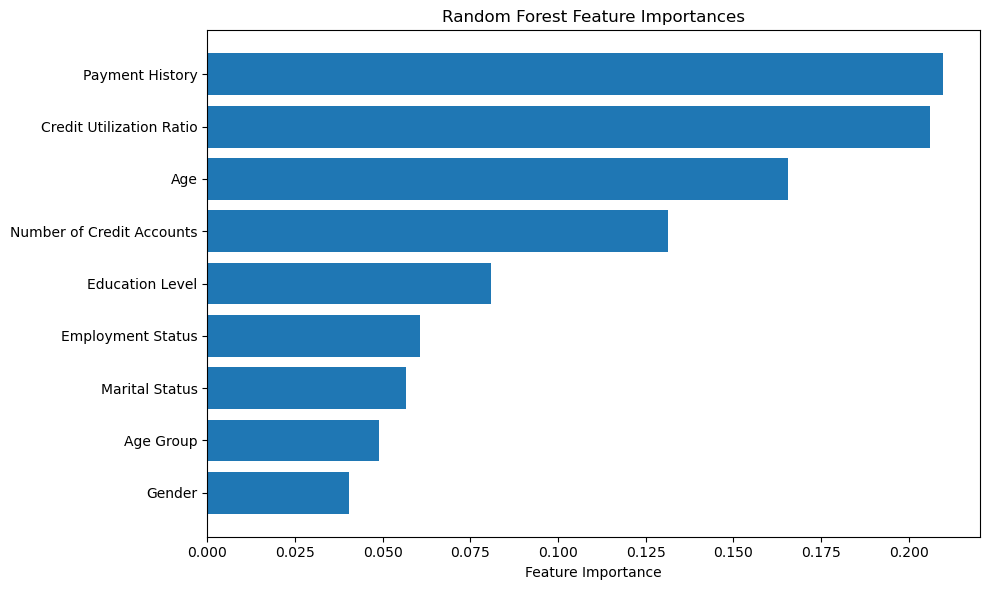

In [32]:
# Get feature importances
# Import required libraries
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [33]:
# Impove Random Forest Accuracy
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [34]:
# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [35]:
# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [36]:
# Best model from grid search
best_rf_model = grid_search.best_estimator_

In [37]:
# Predict and evaluate
y_pred_best_rf = best_rf_model.predict(X_test)

In [38]:
# Print results
print(f"Best Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf, target_names=target_encoder.classes_))

Best Accuracy: 0.38

Classification Report:
                precision    recall  f1-score   support

    Auto Loan       0.42      0.35      0.39        79
    Home Loan       0.41      0.46      0.44        63
Personal Loan       0.28      0.31      0.30        58

     accuracy                           0.38       200
    macro avg       0.37      0.38      0.37       200
 weighted avg       0.38      0.38      0.38       200



In [39]:
# Generate confusion matrices
cm_tree = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [40]:
# Get class labels from the encoder
# Define the labels that correspond to each age group
class_labels = target_encoder.classes_

In [41]:
# Plot confusion matrices
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

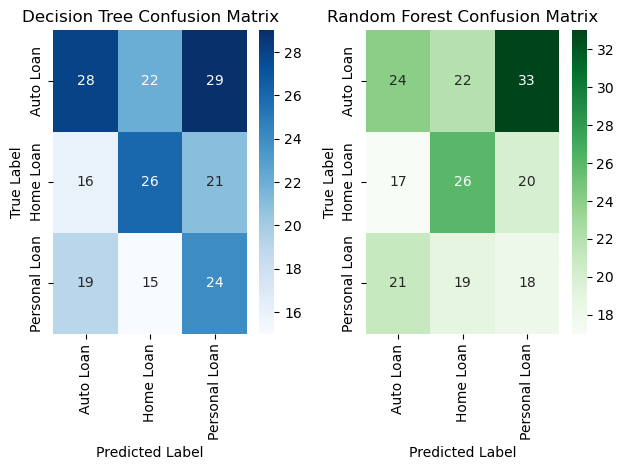

In [42]:
# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


In [43]:
# Define a new random individual's profile for model testing purposes
new_customer = {
    'Age': 34,
    'Gender': 'Female',
    'Marital Status': 'Single',
    'Education Level': 'Bachelor',
    'Employment Status': 'Employed',
    'Credit Utilization Ratio': 0.45,
    'Payment History': 2500,
    'Number of Credit Accounts': 3,
    'Age Group': 'thirties'
}

In [44]:
# Encode categorical fields using the same encoders
encoded_input = []
for col in features:
    val = new_customer[col]
    if col in label_encoders:
        val = label_encoders[col].transform([val])[0]
    encoded_input.append(val)

In [45]:
# Predict loan type
input_array = np.array([encoded_input])
predicted_tree_model = tree_model.predict(input_array)[0]
predicted_forest_model = rf_model.predict(input_array)[0]

c:\Users\mrbow\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\mrbow\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Decode the prediction
predicted_loan_type_tree = target_encoder.inverse_transform([predicted_tree_model])[0]
predicted_loan_type_forest = target_encoder.inverse_transform([predicted_forest_model])[0]

print(f"Predicted Loan Type For New Customer Using Tree Model: {predicted_loan_type_tree}")
print(f"Predicted Loan Type For New Customer Using Random Forest: {predicted_loan_type_forest}")

Predicted Loan Type For New Customer Using Tree Model: Auto Loan
Predicted Loan Type For New Customer Using Random Forest: Personal Loan
